# **Machine Learning | Remote Internship | Bharat Intern**
## **Task No# 02: Movie Recommendations:**
 - Build a Movie Recommendation System using collaborative filtering and machine learning techniques in Python

---

### **About Dataset:**
This dataset is large enough to build good recommendation model and is adapted from `'Netflix prize dataset'` which is very large and you may face memory issue while training a model using that dataset.

Netflix held the Netflix Prize open competition for the best algorithm to predict user ratings for films.

Movie File Description
Movie File Contains Movie_ID, Name, Year

Rating File Description
Rating File Contains Movie_ID, User_ID, Rating
Rating : 1 - 5

**Source:**  https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset

### **Step No# 01: Import Libraries and Load Data:**



 - #### **Import Libraries:**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.optimizers import Adam
import tensorflow as tf

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [12,6]
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

 - #### **Load DataSet:**

In [2]:
# Load the first CSV file (movie.csv)
movie_df = pd.read_csv('Netflix_Movie.csv')

# Load the second CSV file (rating.csv)
rating_df = pd.read_csv('Netflix_Rating.csv')

In [3]:
movie_df.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [5]:
rating_df.head()

,User_ID,Rating,Movie_ID
0,712664,5.0,3.0
1,1331154,4.0,3.0
2,2632461,3.0,3.0
3,44937,5.0,3.0
4,656399,4.0,3.0


In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167561 entries, 0 to 167560
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   167561 non-null  int64  
 1   Rating    167560 non-null  float64
 2   Movie_ID  167560 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 3.8 MB


In [7]:
# Merge the two DataFrames based on the 'movieid' column
merged_df = pd.merge(movie_df, rating_df, on='Movie_ID')

# Display the merged DataFrame
merged_df.head()

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('Netflix_Movies_Rating.csv', index=False)

In [8]:
df = pd.read_csv("Netflix_Movies_Rating.csv")

In [9]:
df.head()

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5.0
1,3,1997,Character,1331154,4.0
2,3,1997,Character,2632461,3.0
3,3,1997,Character,44937,5.0
4,3,1997,Character,656399,4.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167560 entries, 0 to 167559
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Movie_ID  167560 non-null  int64  
 1   Year      167560 non-null  int64  
 2   Name      167560 non-null  object 
 3   User_ID   167560 non-null  int64  
 4   Rating    167560 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.4+ MB


---

### **Step No# 02: Exploratory Data Analysis (EDA)**

   - #### **Display Descriptive Statistics:**

In [11]:
# Display descriptive statistics
df.describe()

,Movie_ID,Year,User_ID,Rating
count,167560.000000,167560.000000,1.675600e+05,167560.000000
mean,28.737801,1999.858367,1.324382e+06,3.646443
std,8.769132,9.067311,7.642431e+05,1.027753
min,3.000000,1952.000000,6.000000e+00,1.000000
25%,28.000000,2002.000000,6.618645e+05,3.000000
50%,30.000000,2003.000000,1.321837e+06,4.000000
75%,30.000000,2003.000000,1.986170e+06,4.000000
max,48.000000,2005.000000,2.649429e+06,5.000000


 - #### **Distribution of Ratings Across Users:**

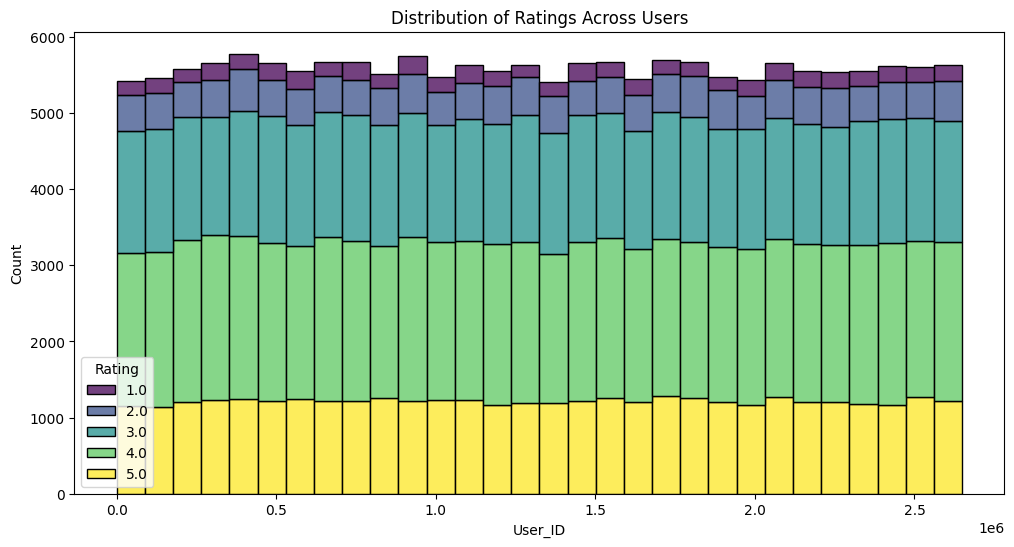

In [12]:
# Distribution of Ratings Across Users
sns.histplot(df, x='User_ID', hue='Rating', multiple='stack', bins=30, palette='viridis')
plt.title('Distribution of Ratings Across Users')
plt.show()

 - #### **Average Movie Ratings Over the Years:**

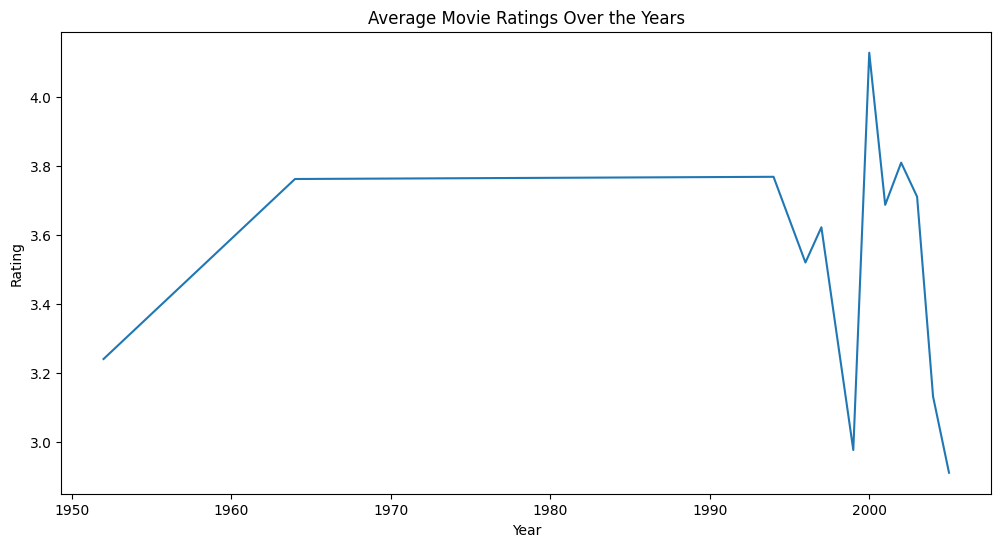

In [13]:
 # Movie Ratings Over the Years
sns.lineplot(x='Year', y='Rating', data=df, estimator='mean', ci=None)
plt.title('Average Movie Ratings Over the Years')
plt.show()

 - #### **Movie Ratings by Name:**

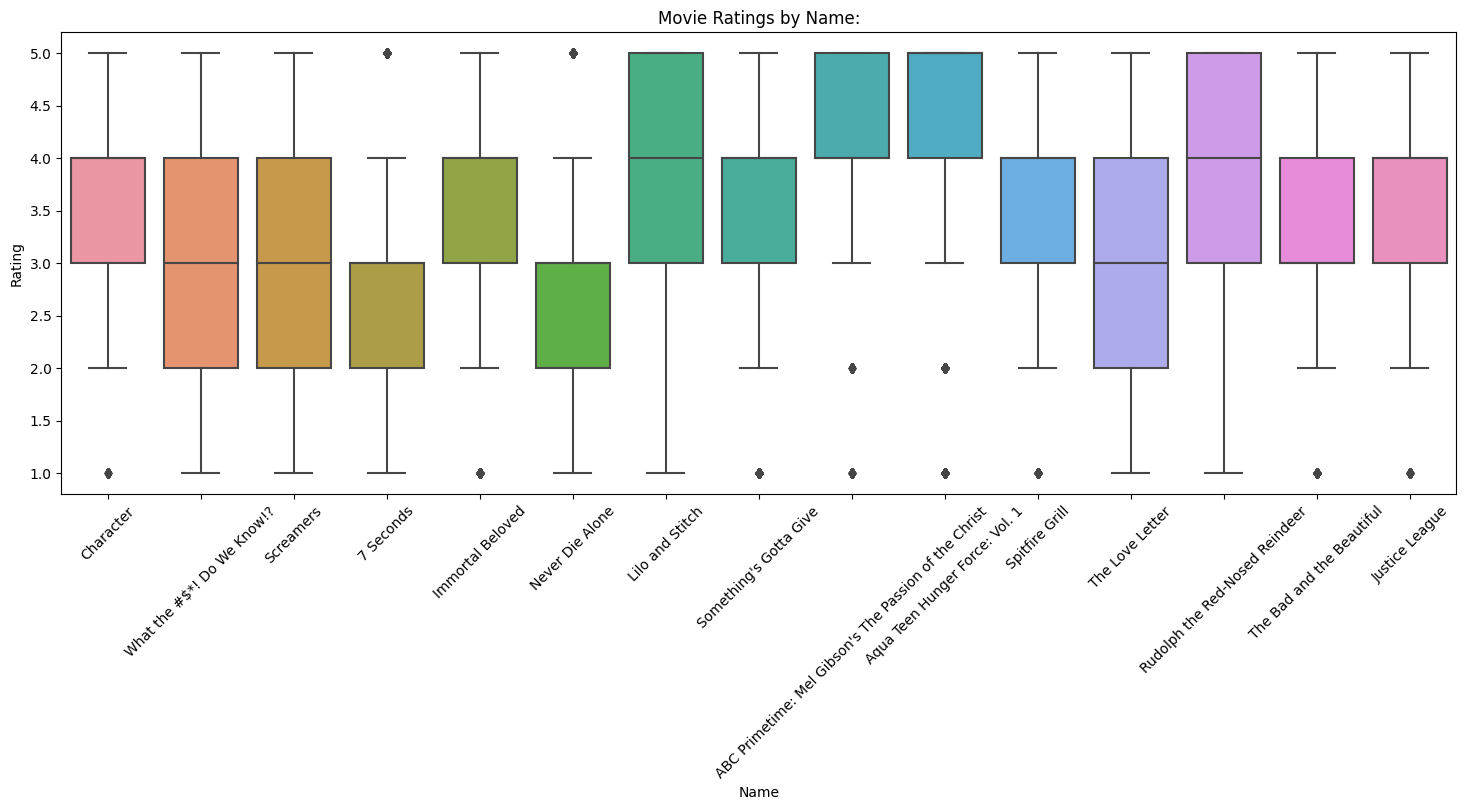

In [14]:
# Movie Ratings by Name
plt.figure(figsize=(18, 6))
sns.boxplot(x='Name', y='Rating', data=df)
plt.title('Movie Ratings by Name:')
plt.xticks(rotation=45)
plt.show()

 - #### **Visualizing Rating Spread for Each Movie:**

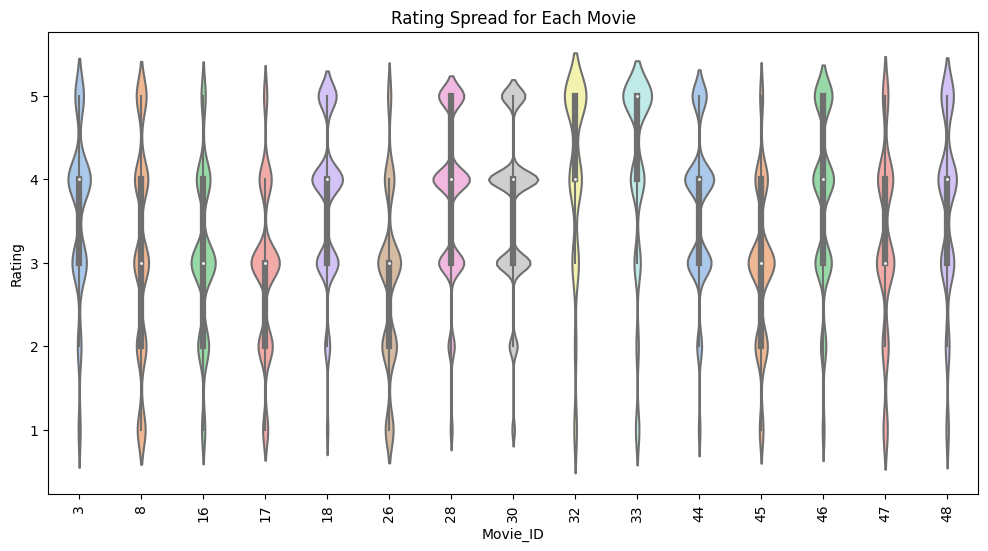

In [15]:
# Visualizing Rating Spread for Each Movie
sns.violinplot(x='Movie_ID', y='Rating', data=df, palette='pastel')
plt.title('Rating Spread for Each Movie')
plt.xticks(rotation=90)
plt.show()

 - #### **Distribution of Ratings by Year and User:**

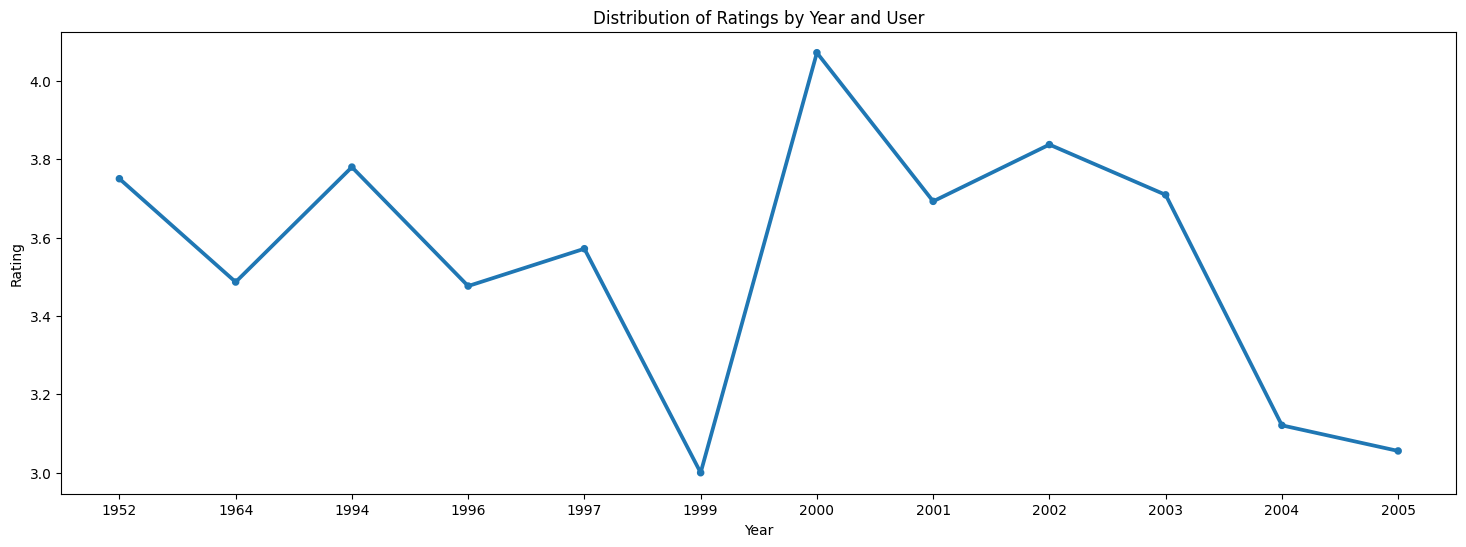

In [16]:
# Distribution of Ratings by Year and User
plt.figure(figsize=(18, 6))
sns.pointplot(x='Year', y='Rating', data=df.sample(1000), ci=None, markers='.', dodge=True)
plt.title('Distribution of Ratings by Year and User')
plt.show()

---

### **Step No# 03: Handling Null Values & Duplicates:**

   -  #### **Check for Missing Values:**

In [17]:
# Check for Missing Values
df.isnull().sum()

Movie_ID    0
Year        0
Name        0
User_ID     0
Rating      0
dtype: int64



*   #### **Remove Duplicates:**



In [18]:
# Remove duplicates
df.drop_duplicates(inplace=True)

 * #### Check for missing values with help of `Heatmap:

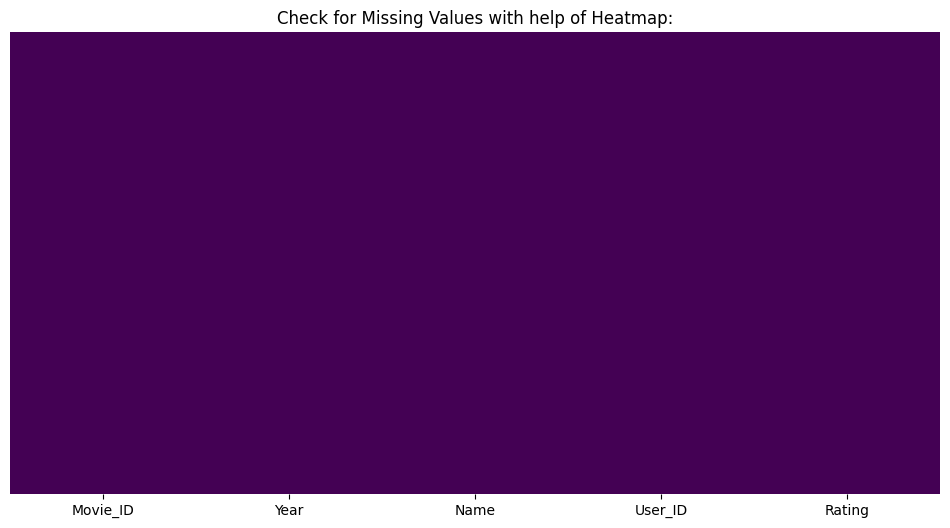

In [19]:
# Check for missing values with help of `Heatmap:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Check for Missing Values with help of Heatmap:")
plt.show()


### **Step No# 04: Handling Outliers**



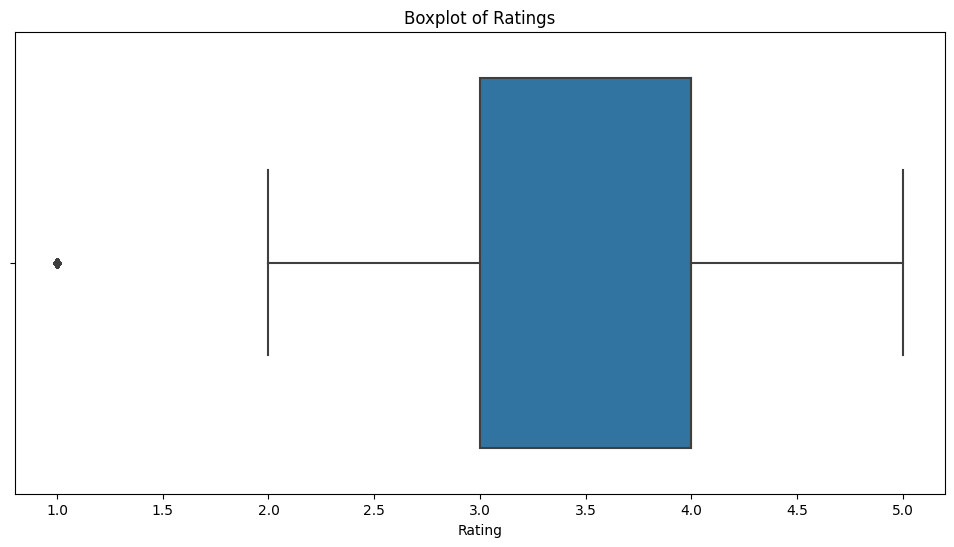

In [20]:
# Handle outliers using different techniques
sns.boxplot(x='Rating', data=df)
plt.title('Boxplot of Ratings')
plt.show()

### **Step No# 05: Data Preprocessing:**


  * #### **Train - Test Split:**



In [21]:
# Train-test split
train, test = train_test_split(df, test_size=0.2, random_state=42)

 * #### **Standardize using scikit-learn StandardScaler:**

In [22]:
# Standardize using scikit-learn StandardScaler
scaler = StandardScaler()
train[['Rating']] = scaler.fit_transform(train[['Rating']])
test[['Rating']] = scaler.transform(test[['Rating']])

### **Step No# 06: Machine Learning Model:**

 * #### **Build and train a machine learning model - Random Forest:**

In [23]:
# Build and train a machine learning model ( Random Forest)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(train[['Movie_ID', 'Year', 'User_ID']], train['Rating'])

RandomForestRegressor(random_state=42)

 * #### **Make predictions:**

In [24]:
# Make predictions
predictions = model_rf.predict(test[['Movie_ID', 'Year', 'User_ID']])
mse = mean_squared_error(test['Rating'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.341000133475384


### **Step No# 07: Neural Network with TensorFlow/Keras:**

 * #### **Build a simple neural network for recommendation:**

In [25]:
# Build a simple neural network for recommendation
model_nn = Sequential([
    Embedding(input_dim=df['Movie_ID'].nunique(), output_dim=50, input_length=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

model_nn.compile(optimizer=Adam(), loss='mse')
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 50)             750       
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 7407 (28.93 KB)
Trainable params: 7407 (28.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 * #### **Train the Neural Network:**

In [26]:
print(train[['Movie_ID']].shape)  # Print input shape before fitting

(134048, 1)


In [27]:
model_nn.fit(x=train[['Movie_ID']], y=train['Rating'], epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
1886/1886 [==============================] - 14s 5ms/step - loss: 0.9869 - val_loss: 0.9792
Epoch 2/5
1886/1886 [==============================] - 7s 4ms/step - loss: 0.9866 - val_loss: 0.9791
Epoch 3/5
1886/1886 [==============================] - 7s 4ms/step - loss: 0.9867 - val_loss: 0.9792
Epoch 4/5
1886/1886 [==============================] - 6s 3ms/step - loss: 0.9863 - val_loss: 0.9795
Epoch 5/5
1886/1886 [==============================] - 7s 4ms/step - loss: 0.9863 - val_loss: 0.9790


### **Step No# 08: User Input for Recommendations:**

In [34]:
# Get user input
user_movie_id = input('Enter Movie ID: ')
user_movie_id = int(user_movie_id)
# Use the trained model to predict the rating
user_rating_prediction = model_nn.predict(np.array([[user_movie_id]]))
rounded_prediction = round(user_rating_prediction[0][0] * 100, 1)  # Adjust the decimal places as needed
print(f'Predicted Rating: {rounded_prediction}')

Enter Movie ID: 4578
1/1 [==============================] - 0s 18ms/step
Predicted Rating: 3.1
